<b>Title:</b> DRAFT REPORT – Week 2: Intro/Problem & Data<br>
<b>Topic:</b>  Seattle Vehicle Accident Severity Prediction<br>
<b>Project:</b>  Applied Data Science Capstone<br>
<b>Author:</b>  Mark Snuffin<br>
<b>Created:</b>  September 23, 2020<br>

# Introduction

The Seattle Department of Transportation (SDOT) Technology Division is preparing their budget for the director and is trying to determine how to allocation funds for the year.  The director of SDOT, wants to provide a mobile application to the citizens of Seattle to help improve driver safety but it needs to be more than just general information. Instead it needs to provide some sort of intelligence to really help the public be safer on the roads, better yet indicate when a trip could be risky.  The technology division knows how to build a mobile app but is not sure if they can create a capability that would suggest how risky it is to travel to a location given the current driving conditions.
<br><br>
After some research they think they can leverage data sciences to solve the problem and decide on predicting accident severity as a test case.  The problem answered by this is test case is given the date, time, weather, light and road conditions, can we predict accident severity within the a geographic area.  If they can successfully build and demonstrate to the SDOT director it will satisfy the director's requirement and they can move ahead with confidence.  Time is of the essence though. They only have a limited amount of time to work on the test case and present the results otherwise the budget planning process will end and will lose the opportunity to improve the safety and wellbeing for many Seattleites not to mention working on an interesting app.

# Data

This project uses accident data from SDOT and is referred to as collisions.  The data is <a href="https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0?geometry=-123.310%2C47.452%2C-121.352%2C47.776">hosted</a> by SDOT GIS Division and curated by the SDOT Traffic Division where collisions are collected from Seattle Police Department after a collision is reported.  Instead of using the full data set this project uses a <a href="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv">subset</a> of the data provided by Coursera.
<br><br>
General characteristics of the subset -
- Format: CSV
- Timeframe: January 2004 to May 2020
- Columns: 38, 37 are unique
- Rows:  194,673
- Bounding Coordinates
-- West Bounding Coordinate: -122.4754
-- East Bounding Coordinate: -122.2008
-- North Bounding Coordinate: 47.7582
-- South Bounding Coordinate: 47.4814

The subset of the SDOT collision data is used that includes collisions, defined by severity, as property damage, e.g., hitting a parked car, or injury where at least one person involved in the collision was hurt.  The complete data set has additional severities however these are not included which might need to be revisited upon further investigation.
<br><br>
Table 1 below represents the attributes to be considered as independent variables for modeling.  Definitions and data types are defined in the <a href="https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf">SDOT Attribute Dictionary</a>.  Samples are extracted from the Coursera Data Set.  The dependent variable is accident severity, defined as SEVERITYCODE.  There are 37 possible independent variables.  Of the 37 possible 17 were selected as independent variables and are specified in the table.  While the goal is to use date, time, weather, light and road conditions to predict accident severity other attributes are worth exploring and could be beneficial as features to the model.
<br><br>
A significant omission from the potential features is the type of collision.  SDOT uses a state-defined coding scheme that specifies 84 types of collisions including an additional descriptive attribute to further define the code.  While the subset includes these codes and is informative the initial iteration does not include these.  This might need to be revisited based on further investigation.
<br>

<table class=MsoTableGrid border=1 cellspacing=0 cellpadding=0
 style='border-collapse:collapse;border:none'>
 <thead>
  <tr>
   <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
   background:black;padding:0in 5.4pt 0in 5.4pt'>
   <p class=MsoNormal align=center style='text-align:center'><b>Attribute</b></p>
   </td>
   <td width=78 valign=top style='width:58.5pt;border:solid windowtext 1.0pt;
   border-left:none;background:black;padding:0in 5.4pt 0in 5.4pt'>
   <p class=MsoNormal align=center style='text-align:center'><b><span
   style='color:white'>Data Type</span></b></p>
   </td>
   <td width=222 valign=top style='width:166.5pt;border:solid windowtext 1.0pt;
   border-left:none;background:black;padding:0in 5.4pt 0in 5.4pt'>
   <p class=MsoNormal align=center style='text-align:center'><b><span
   style='color:white'>Description</span></b></p>
   </td>
   <td width=186 valign=top style='width:139.25pt;border:solid windowtext 1.0pt;
   border-left:none;background:black;padding:0in 5.4pt 0in 5.4pt'>
   <p class=MsoNormal align=center style='text-align:center'><b><span
   style='color:white'>Sample</span></b></p>
   </td>
  </tr>
 </thead>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>SEVERITYCODE</p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Text, 100 </p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>A code that corresponds to the severity of the collision: </p>
  <p class=MsoNormal style='margin-left:.25in;text-indent:-.25in'><span
  style='font-size:10.0pt;font-family:Symbol'>·<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
  </span></span>3—fatality </p>
  <p class=MsoNormal style='margin-left:.25in;text-indent:-.25in'><span
  style='font-size:10.0pt;font-family:Symbol'>·<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
  </span></span>2b—serious injury </p>
  <p class=MsoNormal style='margin-left:.25in;text-indent:-.25in'><span
  style='font-size:10.0pt;font-family:Symbol'>·<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
  </span></span>2—injury </p>
  <p class=MsoNormal style='margin-left:.25in;text-indent:-.25in'><span
  style='font-size:10.0pt;font-family:Symbol'>·<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
  </span></span>1—prop damage </p>
  <p class=MsoNormal style='margin-left:.25in;text-indent:-.25in'><span
  style='font-size:10.0pt;font-family:Symbol'>·<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
  </span></span>0—unknown </p>
  <p class=MsoNormal>&nbsp;</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>1, 2</p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>INCDATE</p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Date</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Date of the incident, from 2004 to 2020</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>2013/03/27</p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>INCDTTM</p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Text, 30</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Date and time of the incident</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>3/27/2013  2:54:00 PM</p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>X</p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Double</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Latitude of the collision</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal><span style='color:black'>-122.32315</span></p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Y</p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Double</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Longitude of the collision</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal><span style='color:black'>47.7031403</span></p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>ADDRTYPE</p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Text, 12 </p>
  <p class=MsoNormal>&nbsp;</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Collision address&nbsp;type</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Alley, Block, Intersection</p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>LOCATION</p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Text, 255</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Description of the&nbsp;general location of the collision</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>5TH AVE NE AND NE 103RD ST</p>
  <p class=MsoNormal>&nbsp;</p>
  <p class=MsoNormal>AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N</p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>WEATHER</p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Text, 300</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Description of the&nbsp;weather conditions during the time
  of the collision</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Blowing Sand/Dirt</p>
  <p class=MsoNormal>Clear</p>
  <p class=MsoNormal>Fog/Smoke/Smog</p>
  <p class=MsoNormal>Other</p>
  <p class=MsoNormal>Overcast</p>
  <p class=MsoNormal>Partly Cloudy</p>
  <p class=MsoNormal>Raining</p>
  <p class=MsoNormal>Severe Crosswind</p>
  <p class=MsoNormal>Sleet/Hail/Freezing Rain</p>
  <p class=MsoNormal>Snowing</p>
  <p class=MsoNormal>Unknown</p>
  <p class=MsoNormal>&nbsp;</p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>ROADCOND</p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Text, 300</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Condition of the&nbsp;road during the collision</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Dry</p>
  <p class=MsoNormal>Ice</p>
  <p class=MsoNormal>Oil</p>
  <p class=MsoNormal>Other</p>
  <p class=MsoNormal>Sand/Mud/Dirt</p>
  <p class=MsoNormal>Snow/Slush</p>
  <p class=MsoNormal>Standing Water</p>
  <p class=MsoNormal>Unknown</p>
  <p class=MsoNormal>Wet</p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>LIGHTCOND</p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Text, 300</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Light conditions&nbsp;during the collision</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Dark – No Street Lights</p>
  <p class=MsoNormal>Dark – Street Lights Off</p>
  <p class=MsoNormal>Dark – Street Lights On</p>
  <p class=MsoNormal>Dark – Unknow Lighting</p>
  <p class=MsoNormal>Dawn</p>
  <p class=MsoNormal>Daylight</p>
  <p class=MsoNormal>Dusk</p>
  <p class=MsoNormal>Other</p>
  <p class=MsoNormal>Unknown</p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>VEHCOUNT</p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Double</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Number of vehicles&nbsp;involved in the collision</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>0 - 12</p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>PERSONCOUNT</p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Double</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Total number of&nbsp;people involved in the collision</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>0 - 81</p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>SPEEDING</p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Text, 1</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>If speeding was a&nbsp;factor in the collision (Y/N)</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Y or blank</p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>HITPARKEDCAR</p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Text, 1</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>If the collision&nbsp;involved hitting a parked car</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Y, N</p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>JUNCTIONTYPE</p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Text, 300</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Category of&nbsp;junction at which collision took place</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>- At Intersection (but not related to intersection)</p>
  <p class=MsoNormal>- At Intersection (intersection related)</p>
  <p class=MsoNormal>- Driveway Junction</p>
  <p class=MsoNormal>- Mid-Block (but intersection related)</p>
  <p class=MsoNormal>- Mid-Block (not related to intersection)</p>
  <p class=MsoNormal>- Ramp Junction</p>
  <p class=MsoNormal>&nbsp;</p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>INATTENTIONIND </p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Text, 1</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Whether or not collision was due to inattention. (Y/N)</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Y or blank</p>
  </td>
 </tr>
 <tr>
  <td width=138 valign=top style='width:103.25pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>UNDERINFL </p>
  </td>
  <td width=78 valign=top style='width:58.5pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Text, 10</p>
  </td>
  <td width=222 valign=top style='width:166.5pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>Whether or not a driver involved was under the influence
  of drugs or alcohol. </p>
  <p class=MsoNormal>&nbsp;</p>
  </td>
  <td width=186 valign=top style='width:139.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal>0, 1, Y, N</p>
  </td>
 </tr>
</table>

For details covering all attributes visit the following link -
https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

Original Data Set - https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0?geometry=-123.310%2C47.452%2C-121.352%2C47.776

Coursera Subset - https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

ESRI Metadata - https://www.arcgis.com/sharing/rest/content/items/5b5c745e0f1f48e7a53acec63a0022ab/info/metadata/metadata.xml?format=default&output=html


## Data Preparation

In [194]:
import pandas as pd
import numpy as np

In [195]:
# Display counts and percentages
def display_count_percent(target_column):
    counts = target_column.value_counts()
    percent = target_column.value_counts(normalize=True)
    print(pd.DataFrame({'Count': counts, 'Percent': percent}))

In [228]:
# Note - add dtypes to the call to clean this up.  Fine for now
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
print('File downloaded')

File downloaded


In [197]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [198]:
print(df.dtypes)
df.shape

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

(194673, 38)

Get rid of the columns not wanted, at least for now

In [199]:
df.drop(columns=['OBJECTID','SEVERITYDESC','INCKEY','COLLISIONTYPE','PEDROWNOTGRNT', 'PEDCYLCOUNT','PEDCOUNT', 'REPORTNO',
                 'COLDETKEY', 'INTKEY','STATUS','EXCEPTRSNCODE','EXCEPTRSNDESC','CROSSWALKKEY','ST_COLCODE',
                 'SEGLANEKEY','SDOTCOLNUM','ST_COLDESC','SDOT_COLCODE','SDOT_COLDESC','SEVERITYCODE.1'], inplace=True)

In [200]:
df = df.dropna(subset=["SEVERITYCODE","ADDRTYPE","UNDERINFL","ROADCOND", \
                       "LIGHTCOND","WEATHER","LOCATION","X","Y"],axis=0)

In [201]:
print(df.dtypes)
df.shape

SEVERITYCODE        int64
X                 float64
Y                 float64
ADDRTYPE           object
LOCATION           object
PERSONCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING           object
HITPARKEDCAR       object
dtype: object


(184167, 17)

Fatalities or serious injuries are excluded in the Coursera dump.  Would be interesting to see those
but these will due for now - I think.

In [202]:
display_count_percent(df['SEVERITYCODE'])

    Count   Percent
1  128154  0.695858
2   56013  0.304142


Clean-up the dates then breakout the day and hour.  The counts and percentages take a while to grind through 
but yield interesting results.  Hours = 0 is when there are no time specified in the data, need to look at 
that some more.  Trying to get home on Friday looks like the the reason, interesting that Sunday AND Monday are
lighter accident days.  For time of day looks like rush hour is the worst, that's expected.

In [204]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['DAY'] = df['INCDATE'].dt.day_name()
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['HOUR'] = df['INCDTTM'].dt.hour
display_count_percent(df['DAY'])
display_count_percent(df['HOUR'])

           Count   Percent
Friday     30518  0.165708
Thursday   27725  0.150543
Wednesday  27170  0.147529
Tuesday    26963  0.146405
Saturday   26057  0.141486
Monday     24869  0.135035
Sunday     20865  0.113294
    Count   Percent
0   28584  0.155207
17  12598  0.068405
16  11814  0.064148
15  11211  0.060874
14  10372  0.056318
12  10065  0.054651
13   9982  0.054201
18   9469  0.051415
8    8275  0.044932
11   7977  0.043314
9    7799  0.042347
10   7225  0.039231
19   7062  0.038346
7    6351  0.034485
20   6041  0.032802
21   5416  0.029408
22   5298  0.028767
23   4434  0.024076
2    3458  0.018776
1    3295  0.017891
6    3085  0.016751
3    1594  0.008655
5    1584  0.008601
4    1178  0.006396


In [161]:
display_count_percent(df["ADDRTYPE"])

               Count   Percent
Block         121023  0.657137
Intersection   63144  0.342863


Need to investigate furhter, not sure of the difference between mid-block.  Might
not look at this attribute at all as a feature so todo.  Drop anything under
~1%.

In [205]:
display_count_percent(df["JUNCTIONTYPE"])

                                                   Count   Percent
Mid-Block (not related to intersection)            84517  0.469315
At Intersection (intersection related)             60930  0.338338
Mid-Block (but intersection related)               22035  0.122358
Driveway Junction                                  10430  0.057917
At Intersection (but not related to intersection)   2030  0.011272
Ramp Junction                                        139  0.000772
Unknown                                                5  0.000028


In [206]:
df.drop(df.loc[df['JUNCTIONTYPE']=='Ramp Junction'].index, inplace=True)
df.drop(df.loc[df['JUNCTIONTYPE']=='Unknown'].index, inplace=True)
display_count_percent(df["JUNCTIONTYPE"])

                                                   Count   Percent
Mid-Block (not related to intersection)            84517  0.469690
At Intersection (intersection related)             60930  0.338609
Mid-Block (but intersection related)               22035  0.122456
Driveway Junction                                  10430  0.057963
At Intersection (but not related to intersection)   2030  0.011281


Driving intoxicated is not a major factor.  However probably would be associated
to more fatalities.  In general looks like not a factor here.

In [207]:
df["UNDERINFL"]=df["UNDERINFL"].replace(['N', 'NaN', 'Y', '0', '1'], [0, 0, 1, 0, 1])
df["UNDERINFL"]=df["UNDERINFL"].replace(np.nan, 0)
df["UNDERINFL"].value_counts().astype(int)

0    175172
1      8851
Name: UNDERINFL, dtype: int64

Driving and texting here is an issue, not a surprise.

In [208]:
df["INATTENTIONIND"] = df["INATTENTIONIND"].replace(['NaN','Y'], [0, 1])
df["INATTENTIONIND"] = df["INATTENTIONIND"].replace(np.nan, 0)
df["INATTENTIONIND"].value_counts().astype(int)

0.0    154963
1.0     29060
Name: INATTENTIONIND, dtype: int64

It doesn't snow much in Seattle but it's always raining.  Get rid of the
unknowns and small % conditions.  Really it's about wet or dry.

In [209]:
display_count_percent(df["ROADCOND"])

                 Count   Percent
Dry             121782  0.661776
Wet              45962  0.249762
Unknown          13791  0.074942
Ice               1171  0.006363
Snow/Slush         984  0.005347
Other              115  0.000625
Standing Water     102  0.000554
Sand/Mud/Dirt       63  0.000342
Oil                 53  0.000288


In [210]:
df.drop(df.loc[df['ROADCOND'] == 'Unknown'].index, inplace=True)
df.drop(df.loc[df['ROADCOND'] == 'Other'].index, inplace=True)
df.drop(df.loc[df['ROADCOND'] == 'Standing Water'].index, inplace=True)
df.drop(df.loc[df['ROADCOND'] == 'Sand/Mud/Dirt'].index, inplace=True)
df.drop(df.loc[df['ROADCOND'] == 'Oil'].index, inplace=True)
display_count_percent(df["ROADCOND"])

             Count   Percent
Dry         121782  0.716791
Wet          45962  0.270525
Ice           1171  0.006892
Snow/Slush     984  0.005792


Results as expected here.  Remove the small buckets.

In [211]:
display_count_percent(df['LIGHTCOND'])

                           Count   Percent
Daylight                  110695  0.651534
Dark - Street Lights On    45932  0.270349
Dusk                        5579  0.032837
Unknown                     2715  0.015980
Dawn                        2352  0.013844
Dark - No Street Lights     1360  0.008005
Dark - Street Lights Off    1092  0.006427
Other                        165  0.000971
Dark - Unknown Lighting        9  0.000053


In [212]:
df.drop(df.loc[df['LIGHTCOND'] == 'Unknown'].index, inplace=True)
df.drop(df.loc[df['LIGHTCOND'] == 'Dark - No Street Lights'].index, inplace=True)
df.drop(df.loc[df['LIGHTCOND'] == 'Dark - Street Lights Off'].index, inplace=True)
df.drop(df.loc[df['LIGHTCOND'] == 'Other'].index, inplace=True)
df.drop(df.loc[df['LIGHTCOND'] == 'Dark - Unknown Lighting'].index, inplace=True)
display_count_percent(df['LIGHTCOND'])

                          Count   Percent
Daylight                 110695  0.672681
Dark - Street Lights On   45932  0.279123
Dusk                       5579  0.033903
Dawn                       2352  0.014293


Combining this with road conditions, it's usually raining in Seattle for the most
part and much snow.  Everything else removed that doesn't account for much.

In [213]:
display_count_percent(df['WEATHER'])

                           Count   Percent
Clear                     105312  0.639969
Raining                    30768  0.186974
Overcast                   25932  0.157586
Unknown                      863  0.005244
Snowing                      790  0.004801
Fog/Smog/Smoke               505  0.003069
Other                        222  0.001349
Sleet/Hail/Freezing Rain     100  0.000608
Blowing Sand/Dirt             41  0.000249
Severe Crosswind              21  0.000128
Partly Cloudy                  4  0.000024


In [214]:
df.drop(df.loc[df['WEATHER'] == 'Unknown'].index, inplace=True)
df.drop(df.loc[df['WEATHER'] == 'Fog/Smog/Smoke'].index,inplace=True)
df.drop(df.loc[df['WEATHER'] == 'Other'].index,inplace=True)
df.drop(df.loc[df['WEATHER'] == 'Sleet/Hail/Freezing Rain'].index,inplace=True)
df.drop(df.loc[df['WEATHER'] == 'Blowing Sand/Dirt'].index,inplace=True)
df.drop(df.loc[df['WEATHER'] == 'Severe Crosswind'].index,inplace=True)
df.drop(df.loc[df['WEATHER'] == 'Partly Cloudy'].index, inplace=True)
display_count_percent(df['WEATHER'])

           Count   Percent
Clear     105312  0.646872
Raining    30768  0.188990
Overcast   25932  0.159286
Snowing      790  0.004853


Speeding is not a major factor.  Todo fix these format fn

In [217]:
display_count_percent(df['SPEEDING'])

   Count  Percent
Y   8183      1.0


In [218]:
df["SPEEDING"] = df["SPEEDING"].replace(['NaN', 'Y'], [0, 1])
df["SPEEDING"] = df["SPEEDING"].replace(np.nan, 0)
df["SPEEDING"].value_counts().astype(int)

0.0    154619
1.0      8183
Name: SPEEDING, dtype: int64

Probably won't use vehicle count but interesting to see.  As expected the accident
is usually with 2 vehicles.

In [230]:
display_count_percent(df['VEHCOUNT'])

     Count   Percent
2   147650  0.758451
1    25748  0.132263
3    13010  0.066830
0     5085  0.026121
4     2426  0.012462
5      529  0.002717
6      146  0.000750
7       46  0.000236
8       15  0.000077
9        9  0.000046
11       6  0.000031
10       2  0.000010
12       1  0.000005


In [231]:
df.drop(df.loc[df['VEHCOUNT'] == 5].index,inplace=True)
df.drop(df.loc[df['VEHCOUNT'] == 0].index,inplace=True)
df.drop(df.loc[df['VEHCOUNT'] == 6].index,inplace=True)
df.drop(df.loc[df['VEHCOUNT'] == 7].index,inplace=True)
df.drop(df.loc[df['VEHCOUNT'] == 8].index,inplace=True)
df.drop(df.loc[df['VEHCOUNT'] == 9].index,inplace=True)
df.drop(df.loc[df['VEHCOUNT'] == 11].index,inplace=True)
df.drop(df.loc[df['VEHCOUNT'] == 10].index,inplace=True)
df.drop(df.loc[df['VEHCOUNT'] == 12].index,inplace=True)
display_count_percent(df['VEHCOUNT'])

    Count   Percent
2  147650  0.781904
1   25748  0.136353
3   13010  0.068896
4    2426  0.012847


Interesting here, asking number of people traveling might be helpful.  The
majority of accidents are with multiple people in the car.  This implies distracted
driver.  The 81 has to be a bus, but that's a lot of people.

In [232]:
display_count_percent(df['PERSONCOUNT'])

     Count   Percent
2   111311  0.589465
3    35141  0.186095
4    14445  0.076496
1    11623  0.061551
5     6270  0.033204
0     5508  0.029168
6     2515  0.013319
7     1028  0.005444
8      485  0.002568
9      188  0.000996
10     111  0.000588
11      45  0.000238
12      27  0.000143
14      17  0.000090
13      17  0.000090
17      10  0.000053
15       9  0.000048
16       7  0.000037
18       6  0.000032
20       6  0.000032
44       6  0.000032
19       5  0.000026
25       5  0.000026
26       4  0.000021
22       4  0.000021
27       3  0.000016
28       3  0.000016
29       3  0.000016
47       3  0.000016
32       3  0.000016
34       3  0.000016
37       3  0.000016
23       2  0.000011
21       2  0.000011
24       2  0.000011
30       2  0.000011
36       2  0.000011
57       1  0.000005
31       1  0.000005
35       1  0.000005
39       1  0.000005
41       1  0.000005
43       1  0.000005
48       1  0.000005
53       1  0.000005
54       1  0.000005
81       1  0

In [233]:
df.drop(df.loc[df['PERSONCOUNT'] == 0].index,inplace=True)
index_to_drop = df[(df['PERSONCOUNT'] > 6)].index
df.drop(index_to_drop , inplace=True)
display_count_percent(df['PERSONCOUNT'])

    Count   Percent
2  111311  0.613943
3   35141  0.193823
4   14445  0.079672
1   11623  0.064107
5    6270  0.034583
6    2515  0.013872


Not to many instances of hitting a parked car.  Probably not valuable
to use this.

In [224]:
display_count_percent(df['HITPARKEDCAR'])

    Count   Percent
N  148357  0.972782
Y    4151  0.027218


Left with 152k of accidents to work with and 19 columns.

In [225]:
print(df.shape)
df.head()

(152508, 19)


,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,PERSONCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,DAY,HOUR
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,2,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),0.0,0,Overcast,Wet,Daylight,0.0,N,Wednesday,14
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),0.0,0,Raining,Wet,Dark - Street Lights On,0.0,N,Wednesday,18
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,4,3,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),0.0,0,Overcast,Dry,Daylight,0.0,N,Thursday,10
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,3,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),0.0,0,Clear,Dry,Daylight,0.0,N,Friday,9
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,2,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),0.0,0,Raining,Wet,Daylight,0.0,N,Wednesday,8


Reshape the dataframe to see what we have.

In [235]:
df_pivot = df[['SEVERITYCODE', 'ROADCOND', 'WEATHER', 'LIGHTCOND']]
df_pivot_2 = (df_pivot.set_index('SEVERITYCODE').stack()
 .groupby(level=[0,1])
 .value_counts()
 .unstack(level=[1,2])
 .fillna(0)
 .sort_index(axis=1))
df_pivot_2.head()

LIGHTCOND                           \
             Dark - No Street Lights Dark - Street Lights Off   
SEVERITYCODE                                                    
1                               1157                      857   
2                                310                      303   

                                                                             \
             Dark - Street Lights On Dark - Unknown Lighting  Dawn Daylight   
SEVERITYCODE                                                                  
1                              32788                       7  1610    74198   
2                              13638                       4   784    36197   

                                 ROADCOND  ... WEATHER                       \
              Dusk Other Unknown      Dry  ...   Clear Fog/Smog/Smoke Other   
SEVERITYCODE                               ...                                
1             3816   175   12710    80612  ...   71799            369   704   
2             1838    49     586    37511  ...   33542            175   110   

                                                              \
             Overcast Partly Cloudy Raining Severe Crosswind   
SEVERITYCODE                                                   
1               18366             2   21194               18   
2                8285             3   10601                6   

                                                       
             Sleet/Hail/Freezing Rain Snowing Unknown  
SEVERITYCODE                                           
1                                  81     718   14108  
2                                  28     161     792  

[2 rows x 29 columns]

Do a sanity check on the coordinates, looks like Seattle to me just skewed.  Denisty lines up with
roadways and downtown.

In [236]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

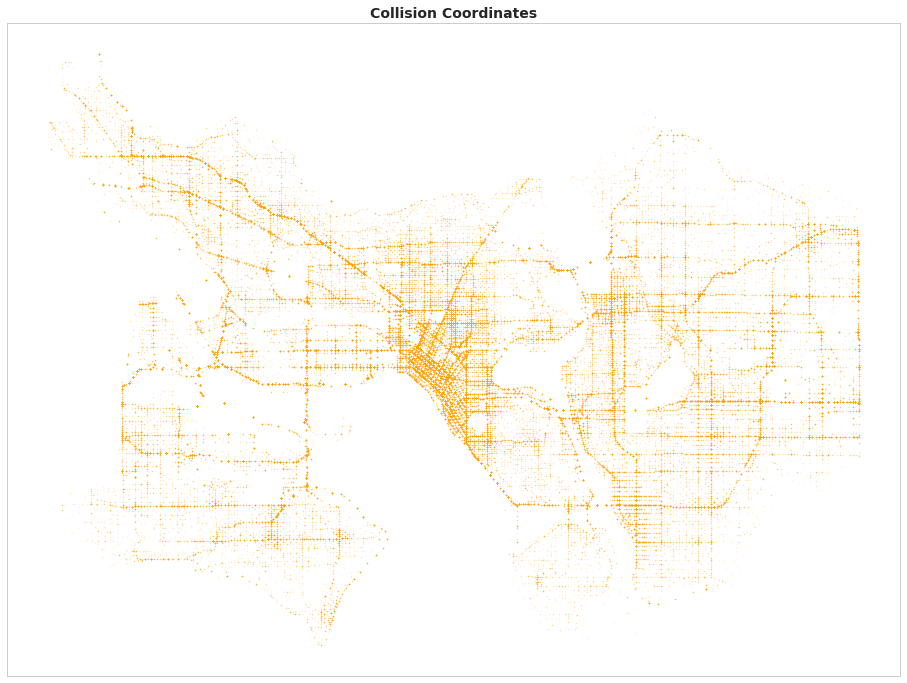

In [237]:
fig, ax1 = plt.subplots(figsize=(16,12))
ax1.scatter(df_new.Y, df_new.X, marker='.', alpha=0.2, s=0.5, c='orange')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.axis(aspect='equal')
t=ax1.set_title("Collision Coordinates", fontweight='bold', fontsize=14)